In [2]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [3]:
# Downloading the Dataset
(x_tr, y_tr), (xt, yt) = keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [4]:
y_tr = y_tr.reshape(-1,)
yt = yt.reshape(-1,)

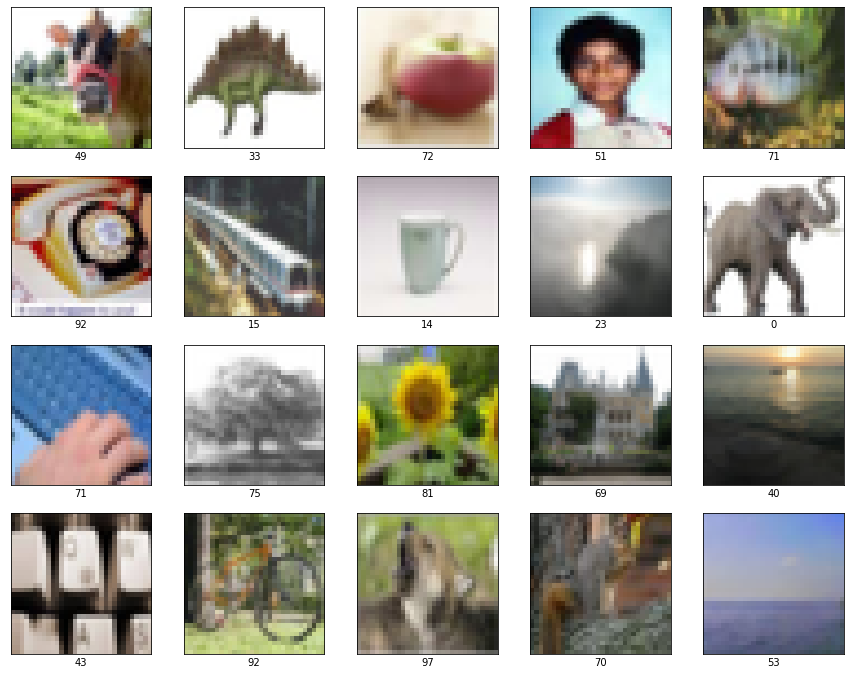

In [5]:
plt.figure(figsize = (15,15))
for image in range(0, 20):
  plt.subplot(5,5, image+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  data_plot = x_tr[image]
  plt.imshow(data_plot)
  plt.xlabel(str(yt[image]))

In [6]:
x_tr = x_tr/255
xt = xt/255

In [21]:
model = keras.Sequential()
#padding = 'same', strides= (2,2)
model.add(Conv2D(input_shape=(32,32,3), kernel_size=(2,2), filters=16))
#model.add(Conv2D(kernel_size=(2,2), filters=32))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2), filters=32))
#model.add(Conv2D(kernel_size=(2,2), filters = 128))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 31, 31, 16)        208       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_12 (Dense)            (None, 512)              

In [22]:
from tensorflow.python import metrics
from keras.optimizers import Optimizer
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'] 
              )

In [25]:
model.fit(x_tr, y_tr, epochs = 20, batch_size=1500)


Epoch 1/20
34/34 [==============================] - 29s 864ms/step - loss: 1.2061 - accuracy: 0.6732
Epoch 2/20
34/34 [==============================] - 29s 857ms/step - loss: 1.1171 - accuracy: 0.7023
Epoch 3/20
34/34 [==============================] - 30s 868ms/step - loss: 1.0560 - accuracy: 0.7178
Epoch 4/20
34/34 [==============================] - 29s 844ms/step - loss: 1.0086 - accuracy: 0.7299
Epoch 5/20
34/34 [==============================] - 29s 849ms/step - loss: 0.9612 - accuracy: 0.7417
Epoch 6/20
34/34 [==============================] - 29s 841ms/step - loss: 0.9186 - accuracy: 0.7545
Epoch 7/20
34/34 [==============================] - 30s 880ms/step - loss: 0.8607 - accuracy: 0.7701
Epoch 8/20
34/34 [==============================] - 29s 854ms/step - loss: 0.8091 - accuracy: 0.7856
Epoch 9/20
34/34 [==============================] - 29s 860ms/step - loss: 0.7659 - accuracy: 0.7956
Epoch 10/20
34/34 [==============================] - 29s 847ms/step - loss: 0.7310 - accura

In [26]:
test_loss, test_acc = model.evaluate(xt, yt)
print ("Test Accuracy: ", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 4.7904 - accuracy: 0.3297
Test Accuracy:  0.3296999931335449
